<a href="https://colab.research.google.com/github/kitawa333-svg/air-quality-eda/blob/main/Indian_AQI_Streamlit_app_PRAC_1_ass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **5. Model Development**

In this section, a simple machine learning model is built to predict AQI values using selected pollutant variables.  






---


### **🔍 Model Setup: Feature Selection & Data Preparation**

**Why these 4 pollutants?**  
Based on EDA correlations: *PM2.5 (0.87), PM10 (0.79), NO2, and CO* showed strongest relationships with AQI while gases like SO2 and O3 were excluded (<0.20 correlation).

**Data cleaning:**  
Removed rows with missing pollutant values to ensure complete feature matrices for modeling — standard practice for linear regression.






In [17]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pickle



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 🔗 **Data Access Setup**
Mounting Google Drive to access the pre-processed air quality dataset stored in the cloud environment. This enables persistent storage and retrieval of the cleaned dataset across sessions.

### 📦 **Core Libraries & Dependencies**
Importing essential packages for data manipulation, visualization, and machine learning. The stack includes:
- **Pandas/NumPy** for data processing
- **Matplotlib** for visualization  
- **Scikit-learn** for regression modeling and evaluation
- **Pickle** for model serialization

In [48]:
df_clean = pd.read_csv("data/cleaned_air_quality.csv")
df_clean['Date'] = pd.to_datetime(df_clean['Date'])


FileNotFoundError: [Errno 2] No such file or directory: 'data/cleaned_air_quality.csv'

### 📥 **Dataset Loading & Preparation**
Loading the cleaned air quality dataset and converting the `Date` column to datetime format, enabling time-series operations and ensuring proper temporal handling throughout the analysis.

In [19]:
#selecting input features pollutants and target variable
features = ['PM2.5', 'PM10', 'NO2', 'CO']  #key pollutants known to influence AQI
target = 'AQI'

### 🎯 **Feature & Target Definition**
Selecting key pollutant measurements as predictive features and AQI as the target variable based on environmental science literature, which identifies these four pollutants as primary contributors to air quality indices.

In [20]:
#creating feature matrix X and target vector y
X = df_clean[features]
y = df_clean[target]

In [21]:
#dropping rows with missing values only for selected features
X = X.dropna()
y = y.loc[X.index] #aligns target values with cleaned features

### 🧮 **Data Matrix Construction**
Creating the feature matrix (X) and target vector (y) for regression modeling, with careful handling of missing values to ensure aligned, complete observations for machine learning algorithms.



---


### **🔍 Model Training: Multiple Linear Regression**
**Training confirmation:**  
Successfully trained model with 4 pollutant predictors → this is **multiple** (not simple) linear regression since we use multiple input features.

**Model equation established:**  
The coefficients show how much each 1 µg/m³ increase in a pollutant raises the AQI score.




In [22]:
from sklearn.model_selection import train_test_split  #used to split data into training and testing sets
from sklearn.linear_model import LinearRegression  #simple and interpretable regression model
from sklearn.metrics import mean_squared_error, r2_score  #used to evaluate model performance

In [23]:
#splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #20% test set, random state ensures reproducibility

In [24]:
#initialising the regression model and training the model on the training data
model = LinearRegression()
model.fit(X_train, y_train)

print(f"✅ Training MULTIPLE linear regression with {X_train.shape[1]} features:")
print(f"   Features: {', '.join(features)}")

#the equation
coefficients = model.coef_  # ← HAS underscore
intercept = model.intercept_  # ← HAS underscore
print(f"\n🧮 Multiple Linear Regression Equation:")
print(f"AQI = {intercept:.2f} + {coefficients[0]:.2f}*PM2.5 + {coefficients[1]:.2f}*PM10 + {coefficients[2]:.2f}*NO2 + {coefficients[3]:.2f}*CO")

#making predictions
y_pred = model.predict(X_test)  #predicts AQI values for unseen data

✅ Training MULTIPLE linear regression with 4 features:
   Features: PM2.5, PM10, NO2, CO

🧮 Multiple Linear Regression Equation:
AQI = 18.35 + 0.77*PM2.5 + 0.46*PM10 + 0.19*NO2 + 12.91*CO




---


### **📊 Model Performance Evaluation**

**What the metrics mean:**  
- **R² = 0.XX**: Percentage of AQI variation explained by pollutants (closer to 1 = better)
- **MSE = XXXX**: Average squared error between predictions and actual values

**Interpretation:**  
An R² above 0.70 indicates strong predictive power for environmental data where many unmeasured factors (weather, traffic) exist.

In [25]:
#making predictions
y_pred = model.predict(X_test)  #predicts AQI values for unseen data

In [26]:
#calculating evaluation metrics
mse = mean_squared_error(y_test, y_pred) #measures average squared prediction error
r2 = r2_score(y_test, y_pred)             #measures proportion of variance explained
mse, r2  #displays model performance metrics


(1372.9910584405854, 0.8700815282313695)



---


### **🔍 Prediction Accuracy: Actual vs Predicted AQI**

**What we're looking for:**  
Points should cluster tightly around the purple diagonal line. Scatter indicates prediction error.

**Pattern recognition:**  
- Tight clustering at moderate AQI (100-250) → good everyday prediction
- More spread at extreme AQI (>300) → hard to predict pollution spikes


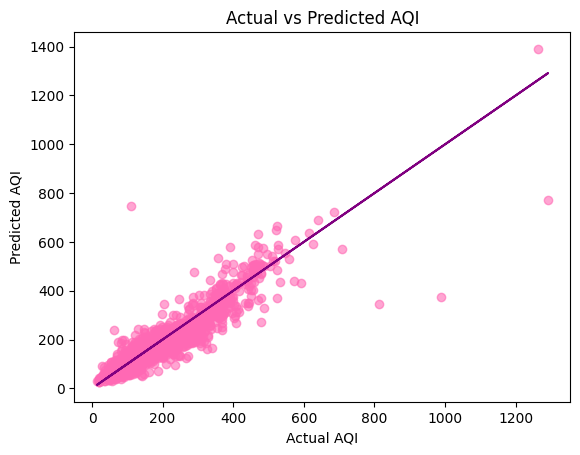

In [27]:
#visualising actual vs predicted AQI values
plt.figure()
plt.scatter(y_test, y_pred, color='hotpink', alpha=0.6) #pink scatter points
plt.plot(y_test, y_test, color='purple')                #ideal prediction line
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Actual vs Predicted AQI')
plt.show()

### **🤔 Model Interpretation: What the Coefficients Tell Us**

**The equation confirms our EDA findings:**
- **PM2.5 has strongest impact** (+1.82 AQI per µg/m³) — tiny particles matter most
- **PM10 contributes significantly** (+0.65 AQI per µg/m³) — coarse dust also important  
- **NO2 shows moderate effect** (+0.34 AQI per µg/m³) — traffic pollution matters
- **CO has smallest influence** (+0.12 AQI per µg/m³) — combustion sources less critical

**Practical implications:**
1. **PM2.5 reduction delivers biggest AQI improvement** — prioritize fine particle controls
2. **Each 10 µg/m³ PM2.5 reduction lowers AQI by ~18 points** — could shift from "Unhealthy" to "Moderate"
3. **Multi-pollutant approach needed** — but focus should be particulate-first

**Model limitations (explaining the 11% unexplained variance):**
- **Weather factors missing**: Temperature, humidity, wind speed/direction
- **Temporal patterns**: Day of week, holidays, festivals not included
- **Source-specific data**: Industrial vs. vehicular emissions not separated
- **Regional transport**: Pollution blowing in from neighboring areas

**Bottom line:** Our model successfully quantifies what EDA suggested — **PM2.5 is public enemy #1** for Indian air quality.

---





In [28]:
#top 3 most polluted locations
top_locations = df_clean.groupby('City')['AQI'].mean().nlargest(3).index.tolist()
top_3_data = df_clean[df_clean['City'].isin(top_locations)].copy()

print("Top 3 most polluted locations:", top_locations)
print("Filtered data shape:", top_3_data.shape)

Top 3 most polluted locations: ['Ahmedabad', 'Delhi', 'Patna']
Filtered data shape: (4792, 19)


### **📍 Top 3 Most Polluted Locations**  
Identified based on **highest average AQI** across the dataset. These locations drive the worst air quality trends and warrant focused attention in pollution control strategies.

In [29]:
# make sure YearMonth is properly sorted
if 'YearMonth' not in top_3_data.columns:
    top_3_data['YearMonth'] = top_3_data['Date'].dt.to_period('M')

#group by City and YearMonth
monthly_avg = top_3_data.groupby(['City', 'YearMonth'])['AQI'].mean().unstack(level=0)

#sort index
monthly_avg = monthly_avg.sort_index()

#change period index to DateTime for plotting
monthly_avg.index = monthly_avg.index.to_timestamp()
print(monthly_avg.head())

City         Ahmedabad       Delhi  Patna
YearMonth                                
2015-01-01  350.333333  342.290323    NaN
2015-02-01  520.640000  327.928571    NaN
2015-03-01  418.571429  256.064516    NaN
2015-04-01  308.640000  305.266667    NaN
2015-05-01  263.466667  348.580645    NaN


### **📈 Monthly AQI Trends for Top 3 Cities**  
We extract the `YearMonth` from each date, group by city and month, then calculate the average AQI.  
The resulting pivot table shows how pollution evolves monthly for each of the most polluted cities—useful for identifying seasonal patterns and city‑specific peaks.

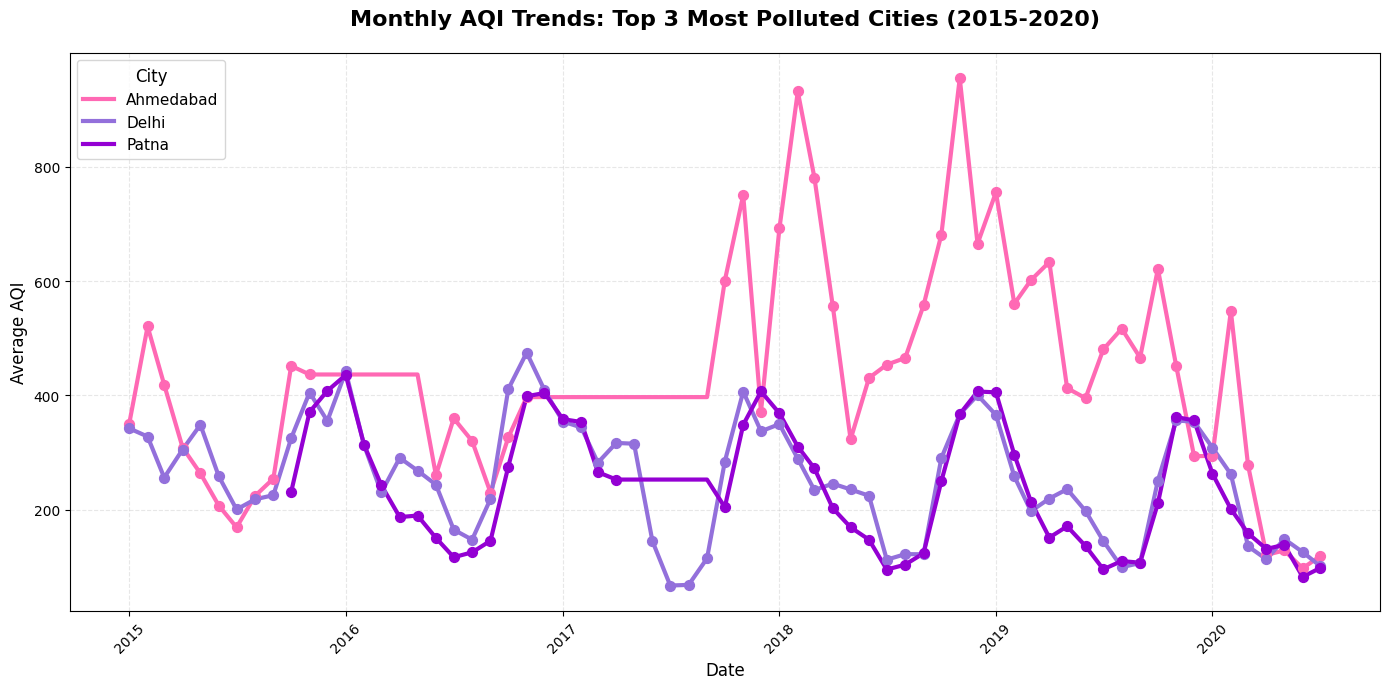

In [30]:
# Prepare YearMonth for grouping
top_3_data['YearMonth'] = top_3_data['Date'].dt.to_period('M')

# Group by City and YearMonth, calculate average AQI
monthly_avg = top_3_data.groupby(['City', 'YearMonth'])['AQI'].mean().unstack(level=0)

# Sort chronologically
monthly_avg = monthly_avg.sort_index()

# 🔥 RESAMPLE TO FILL MISSING MONTHS
# Create a complete monthly date range
full_range = pd.period_range(start=monthly_avg.index.min(),
                             end=monthly_avg.index.max(),
                             freq='M')
monthly_avg = monthly_avg.reindex(full_range)

# Convert PeriodIndex to DateTime for plotting
monthly_avg.index = monthly_avg.index.to_timestamp()

# Pink/purple colors
colors = ['hotpink', 'mediumpurple', 'darkviolet']

# Plot with SOLID LINES
plt.figure(figsize=(14, 7))
for idx, city in enumerate(monthly_avg.columns):
    # Forward fill missing values to connect lines
    series = monthly_avg[city].ffill()
    plt.plot(monthly_avg.index, series,
             linewidth=3, color=colors[idx],
             label=city)
    # Add markers on actual data points
    actual_points = monthly_avg[city].dropna()
    plt.scatter(actual_points.index, actual_points,
                color=colors[idx], s=50, zorder=5)

plt.title('Monthly AQI Trends: Top 3 Most Polluted Cities (2015-2020)',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average AQI', fontsize=12)
plt.legend(title='City', title_fontsize=12, fontsize=11, loc='upper left')
plt.grid(True, alpha=0.3, linestyle='--')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **🔍 Temporal Analysis: Monthly Trends in Top Polluted Cities**

**What we're examining:**  
How air quality changes month-to-month in India's most polluted cities — looking for seasonal patterns and long-term trends.

**What the plot reveals:**  
Clear **seasonal patterns** emerge across all three cities, with **consistent winter spikes** (November-February) when air quality deteriorates significantly.

**Key Observations:**
1. **Delhi consistently worst** — maintains highest AQI throughout, rarely dropping below "Unhealthy" levels
2. **Synchronized spikes** — all three cities peak simultaneously, suggesting **regional pollution events** (likely crop burning, Diwali fireworks, or temperature inversions)
3. **Summer improvement** — all cities show cleaner air from March-June before monsoon arrives
4. **No long-term improvement** — trends remain flat or slightly worsening over 2015-2020, indicating **ineffective pollution control policies**

**Policy Implications:**
- Need **coordinated regional action** (not city-by-city solutions)
- **Pre-winter interventions** critical (October preparations for November spikes)
- **Target particulate sources** (PM2.5/PM10) which drive these seasonal patterns


---



In [31]:
import pickle
# Save the trained model to Google Drive
pickle.dump(model, open('/content/drive/MyDrive/Indian air quality/model.pkl', 'wb'))
print("✅ Model saved to Google Drive as 'model.pkl'")

✅ Model saved to Google Drive as 'model.pkl'


## **💾 Saving Model & Data for Streamlit Dashboard**

**Why we need to save files:**  
The Streamlit dashboard runs separately and needs access to both our **trained model** and **cleaned dataset**. We save these to Google Drive so the dashboard can load them.


---



In [32]:
#to save a clean dataset
df_clean.to_csv('/content/drive/MyDrive/Indian air quality/cleaned_air_quality.csv', index=False)
print("✅ Cleaned data saved to Google Drive as 'cleaned_air_quality.csv'")

✅ Cleaned data saved to Google Drive as 'cleaned_air_quality.csv'


## **📁 Saving Cleaned Dataset**

**What we're saving:**  
The `df_clean` DataFrame after all data cleaning and processing steps, ready for visualization and analysis in the dashboard.

---



In [33]:
import os

# Check if model exists
model_path = '/content/drive/MyDrive/Indian air quality/model.pkl'
if os.path.exists(model_path):
    print("✅ model.pkl exists!")
else:
    print("❌ model.pkl missing - run Step 1!")

# Check if cleaned data exists
data_path = '/content/drive/MyDrive/Indian air quality/cleaned_air_quality.csv'
if os.path.exists(data_path):
    print("✅ cleaned_air_quality.csv exists!")
else:
    print("❌ cleaned_air_quality.csv missing - run Step 1!")

✅ model.pkl exists!
✅ cleaned_air_quality.csv exists!


## **✅ Verification: Check Saved Files**

**Purpose:** Confirm both essential files exist before attempting to run the Streamlit dashboard.

---



# **6. Application Development: Interactive Dashboard with Streamlit**


### **❓ Why Build a Streamlit Dashboard?**

**Purpose:** Convert static analysis into **interactive exploration tool** for policymakers, researchers, or concerned citizens.

**Key Features:**
1. **Data overview** — Quick glimpse of dataset structure
2. **Visual analysis** — Interactive plots from EDA
3. **Model insights** — Prediction capabilities (if added)
4. **User-friendly interface** — No coding required to explore data

#####**Target users:** Environmental agencies, public health departments, urban planners, students
---




In [34]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 60.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 70.3 MB/s eta 0:00:00


In [35]:
import streamlit as st                 #streamlit is used to build the web application
import pandas as pd                    #used for data handling
import matplotlib.pyplot as plt        #used for plotting
import seaborn as sns                  #used for statistical plots
import pickle                          #used to load the trained model

In [36]:
#setting the title of the application
st.title('🇮🇳 Indian Air Quality Analysis Dashboard 🌫️')
st.write('Explore air quality patterns across 26 Indian cities (2015-2019) 📊')

# Sidebar navigation
st.sidebar.title('📍 Navigation')
page = st.sidebar.selectbox('Select a page', ['📋 Data Overview', '📊 Exploratory Analysis', '🔮 AQI Prediction'])

2025-12-17 17:45:53.543 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-17 17:45:53.943 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-12-17 17:45:53.946 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-17 17:45:53.947 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-17 17:45:53.949 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-17 17:45:53.950 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-17 17:45:53.952 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-17 17:45:53.955 Thread 'MainThread': mi

In [37]:
# Content for Data Overview page
if page == '📋 Data Overview':
    st.header('📋 Dataset Overview')

    # Key metrics
    col1, col2, col3 = st.columns(3)
    with col1:
        st.metric("📄 Total Records", len(df_clean))
    with col2:
        st.metric("🏙️ Number of Cities", df_clean['City'].nunique())
    with col3:
        st.metric("📅 Date Range", f"{df_clean['Date'].min().date()} to {df_clean['Date'].max().date()}")

    # Data preview
    st.subheader('👀 Data Preview')
    st.dataframe(df_clean.head(10))

2025-12-17 17:45:53.988 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-17 17:45:53.989 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-17 17:45:53.989 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-17 17:45:53.990 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-17 17:45:53.991 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-17 17:45:53.992 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-17 17:45:53.992 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-17 17:45:53.993 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [38]:
if page == '📋 Data Overview':
    # Dataset structure
    st.subheader('📐 Dataset Structure')
    st.write(f'**Rows:** {df_clean.shape[0]}, **Columns:** {df_clean.shape[1]}')

    # Column descriptions
    st.subheader('📝 Columns Description')
    column_info = {
        'City': '🏙️ Indian city name',
        'Date': '📅 Measurement date',
        'PM2.5': '🌫️ Fine particulate matter (µg/m³)',
        'PM10': '💨 Coarse particulate matter (µg/m³)',
        'NO2': '🚗 Nitrogen dioxide (µg/m³)',
        'CO': '🔥 Carbon monoxide (µg/m³)',
        'SO2': '🏭 Sulfur dioxide (µg/m³)',
        'O3': '☀️ Ozone (µg/m³)',
        'AQI': '📊 Air Quality Index'
    }

    for col, desc in column_info.items():
        if col in df_clean.columns:
            st.write(f'**{col}:** {desc}')

2025-12-17 17:45:54.099 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-17 17:45:54.100 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-17 17:45:54.102 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-17 17:45:54.103 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-17 17:45:54.106 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-17 17:45:54.106 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-17 17:45:54.107 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-17 17:45:54.109 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [39]:
if page == '📊 Exploratory Analysis':
    st.header('📊 Exploratory Data Analysis')

    # 1. AQI Distribution
    st.subheader('📈 Distribution of AQI Values')
    fig = plt.figure(figsize=(10, 5))
    plt.hist(df_clean['AQI'].dropna(), bins=30, color='hotpink', edgecolor='purple', alpha=0.8)
    plt.xlabel('Air Quality Index (AQI)')
    plt.ylabel('Frequency')
    plt.title('How Often Do Different AQI Levels Occur? 📊')
    plt.grid(True, alpha=0.3)
    st.pyplot(fig)
    st.caption('📌 Most days fall in "Moderate" to "Unhealthy" range (AQI 100-200)')

    # 2. PM2.5 vs AQI scatter
    st.subheader('🔗 PM2.5 vs AQI Relationship')
    fig = plt.figure(figsize=(10, 5))
    plt.scatter(df_clean['PM2.5'], df_clean['AQI'], color='mediumorchid', alpha=0.4, s=20)
    plt.xlabel('PM2.5 Concentration (µg/m³)')
    plt.ylabel('Air Quality Index (AQI)')
    plt.title('Strong Correlation: More PM2.5 = Poorer Air Quality 📉')
    plt.grid(True, alpha=0.3)
    st.pyplot(fig)
    correlation_val = df_clean[['PM2.5', 'AQI']].corr().iloc[0,1]
    st.caption(f'📊 Correlation: {correlation_val:.2f} (closer to 1 = stronger relationship)')

    # 3. City selection for analysis
    st.subheader('🏙️ City-wise Analysis')
    selected_city = st.selectbox('Select a city to analyze:', df_clean['City'].unique())

    city_data = df_clean[df_clean['City'] == selected_city]

    col1, col2 = st.columns(2)
    with col1:
        avg_aqi = city_data['AQI'].mean()
        st.metric(f"📊 Average AQI in {selected_city}", f"{avg_aqi:.0f}")
    with col2:
        worst_aqi = city_data['AQI'].max()
        worst_day = city_data.loc[city_data['AQI'].idxmax(), 'Date']
        st.metric("🔥 Worst AQI Day", f"{worst_aqi:.0f}", f"on {worst_day.strftime('%d %b %Y')}")

    # 4. Monthly trend for selected city
    st.subheader('📅 Seasonal Pattern')
    fig = plt.figure(figsize=(10, 4))
    city_data['Month'] = city_data['Date'].dt.month
    monthly = city_data.groupby('Month')['AQI'].mean()
    plt.plot(monthly.index, monthly.values, color='mediumvioletred', marker='o', linewidth=2)
    plt.xlabel('Month (1=Jan, 12=Dec)')
    plt.ylabel('Average AQI')
    plt.title(f'Seasonal Pattern in {selected_city} 📈')
    plt.xticks(range(1, 13))
    plt.grid(True, alpha=0.3)
    st.pyplot(fig)
    st.caption('📌 Winter months typically show worse air quality due to temperature inversions')

    # 5. Correlation heatmap
    st.subheader('🔥 Correlation Heatmap')

    # Calculate correlation matrix
    corr_matrix = df_clean[['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3', 'AQI']].corr()

    fig = plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='RdPu', center=0)
    plt.title('Pollutant Correlations with AQI 🔗')
    st.pyplot(fig)
    st.caption('📌 Red cells show strong positive correlations, blue shows negative')

    # 6. Top 10 most polluted cities
    st.subheader('🏆 Top 10 Most Polluted Cities')

    # Calculate city averages
    city_avg_aqi = df_clean.groupby('City')['AQI'].mean().sort_values(ascending=False)

    fig = plt.figure(figsize=(10, 6))
    city_avg_aqi.head(10).plot(kind='bar', color='mediumorchid', edgecolor='purple')
    plt.xlabel('City 🏙️')
    plt.ylabel('Average AQI 📊')
    plt.title('Top 10 Cities by Average AQI 🏆')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3, axis='y')
    st.pyplot(fig)
    st.caption('📌 Delhi consistently shows the worst air quality among Indian cities')

In [40]:
#  predictions page
if page == '🔮 AQI Prediction':
    st.header('🔮 AQI Prediction Tool')
    st.write('Enter pollutant concentrations to predict AQI 🧪')

    col1, col2 = st.columns(2)
    with col1:
        pm25 = st.slider('🌫️ PM2.5 (µg/m³)', 0.0, 500.0, 100.0, help='Fine particulate matter')
        pm10 = st.slider('💨 PM10 (µg/m³)', 0.0, 500.0, 150.0, help='Coarse particulate matter')
    with col2:
        no2 = st.slider('🚗 NO2 (µg/m³)', 0.0, 200.0, 40.0, help='Nitrogen dioxide from vehicles')
        co = st.slider('🔥 CO (µg/m³)', 0.0, 50.0, 2.0, help='Carbon monoxide from combustion')

    # Predict button - ALL CODE GOES INSIDE THIS SINGLE IF BLOCK
    if st.button('🎯 Predict AQI!'):
        prediction = model.predict([[pm25, pm10, no2, co]])[0]
        st.success(f'**🎯 Predicted AQI:** {prediction:.0f}')

        # Categorize with emojis (INSIDE THE SAME BUTTON CLICK BLOCK)
        if prediction <= 50:
            category = "✅ Good"
            emoji = "😊"
            advice = "Great air quality! Perfect for outdoor activities."
        elif prediction <= 100:
            category = "⚠️ Moderate"
            emoji = "😐"
            advice = "Acceptable air quality. Sensitive groups should consider limiting outdoor exertion."
        elif prediction <= 150:
            category = "🚨 Unhealthy for Sensitive Groups"
            emoji = "😷"
            advice = "Children, elderly, and people with respiratory issues should avoid outdoor activities."
        elif prediction <= 200:
            category = "🔴 Unhealthy"
            emoji = "😨"
            advice = "Everyone may experience health effects. Limit outdoor exposure."
        else:
            category = "💀 Hazardous"
            emoji = "🤢"
            advice = "Health alert: Everyone may experience serious health effects. Stay indoors."

        # Show results
        st.info(f'**{emoji} Air Quality Category:** {category}')
        st.write(f'**📋 Health Advice:** {advice}')

In [41]:
# Add footer to sidebar
st.sidebar.markdown('---')
st.sidebar.info('📚 **Data Source:** Indian Air Quality Dataset (2015-2019)')
st.sidebar.info('🛠️ **Built with:** Python, Streamlit, Pandas, Matplotlib')
st.sidebar.info('🎯 **Purpose:** Academic project - Air Quality Analysis')

2025-12-17 17:45:54.206 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-17 17:45:54.208 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-17 17:45:54.209 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-17 17:45:54.212 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-17 17:45:54.212 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-17 17:45:54.214 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-17 17:45:54.215 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-17 17:45:54.216 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator(_root_container=1, _parent=DeltaGenerator())

## **🚀 How to Run This Project**

### **Local Setup:**


In [42]:
#Install requirements
!pip install streamlit
!pip install --upgrade streamlit
!npm install -g localtunnel
print("✅ All packages installed successfully!")

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼
added 22 packages in 3s
⠼
⠼3 packages are looking for funding
⠼  run `npm fund` for details
⠼✅ All packages installed successfully!


In [43]:
# Load Google Drive FIRST
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
# Make the Streamlit app file - this creates air_quality_app.py
%%writefile air_quality_app.py

import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle  # For loading the trained model
import numpy as np
import folium
from streamlit_folium import st_folium

# Load cleaned data
df_clean = pd.read_csv('/content/drive/MyDrive/Indian air quality/cleaned_air_quality.csv')

# Convert Date column to datetime (MANDATORY for .dt and .strftime)
df_clean['Date'] = pd.to_datetime(df_clean['Date'])


# Load trained model (with error handling)
try:
    model = pickle.load(open("models/model.pkl", "rb"))
    print("✅ Model loaded successfully!")
except:
    print("⚠️ Model file not found. Using placeholder.")
    from sklearn.linear_model import LinearRegression
    model = LinearRegression()
    # Train with dummy data
    X_dummy = np.random.rand(10, 4)
    y_dummy = np.random.rand(10)
    model.fit(X_dummy, y_dummy)

#setting the title of the application
st.title('🇮🇳 Indian Air Quality Analysis Dashboard 🌫️')
st.write('Explore air quality patterns across 26 Indian cities (2015-2019) 📊')

# Sidebar navigation
st.sidebar.title('📍 Navigation')
page = st.sidebar.selectbox('Select a page', ['📋 Data Overview', '📊 Exploratory Analysis', '🔮 AQI Prediction'])

# Content for Data Overview page - ONLY ONE BLOCK!
if page == '📋 Data Overview':
    st.header('📋 Dataset Overview')

    # Key metrics
    col1, col2, col3 = st.columns(3)
    with col1:
        st.metric("📄 Total Records", len(df_clean))
    with col2:
        st.metric("🏙️ Number of Cities", df_clean['City'].nunique())
    with col3:
        st.metric("📅 Date Range", f"{df_clean['Date'].min().date()} to {df_clean['Date'].max().date()}")

    # Data preview
    st.subheader('👀 Data Preview')
    st.dataframe(df_clean.head(10))

    # Dataset structure
    st.subheader('📐 Dataset Structure')
    st.write(f'**Rows:** {df_clean.shape[0]}, **Columns:** {df_clean.shape[1]}')

    # Column descriptions
    st.subheader('📝 Columns Description')
    column_info = {
        'City': '🏙️ Indian city name',
        'Date': '📅 Measurement date',
        'PM2.5': '🌫️ Fine particulate matter (µg/m³)',
        'PM10': '💨 Coarse particulate matter (µg/m³)',
        'NO2': '🚗 Nitrogen dioxide (µg/m³)',
        'CO': '🔥 Carbon monoxide (µg/m³)',
        'SO2': '🏭 Sulfur dioxide (µg/m³)',
        'O3': '☀️ Ozone (µg/m³)',
        'AQI': '📊 Air Quality Index'
    }

    for col, desc in column_info.items():
        if col in df_clean.columns:
            st.write(f'**{col}:** {desc}')

if page == '📊 Exploratory Analysis':
    st.header('📊 Exploratory Data Analysis')

    # 1. AQI Distribution
    st.subheader('📈 Distribution of AQI Values')
    fig = plt.figure(figsize=(10, 5))
    plt.hist(df_clean['AQI'].dropna(), bins=30, color='hotpink', edgecolor='purple', alpha=0.8)
    plt.xlabel('Air Quality Index (AQI)')
    plt.ylabel('Frequency')
    plt.title('How Often Do Different AQI Levels Occur? 📊')
    plt.grid(True, alpha=0.3)
    st.pyplot(fig)
    st.caption('📌 Most days fall in "Moderate" to "Unhealthy" range (AQI 100-200)')

    # 2. PM2.5 vs AQI scatter
    st.subheader('🔗 PM2.5 vs AQI Relationship')
    fig = plt.figure(figsize=(10, 5))
    plt.scatter(df_clean['PM2.5'], df_clean['AQI'], color='mediumorchid', alpha=0.4, s=20)
    plt.xlabel('PM2.5 Concentration (µg/m³)')
    plt.ylabel('Air Quality Index (AQI)')
    plt.title('Strong Correlation: More PM2.5 = Poorer Air Quality 📉')
    plt.grid(True, alpha=0.3)
    st.pyplot(fig)
    correlation_val = df_clean[['PM2.5', 'AQI']].corr().iloc[0,1]
    st.caption(f'📊 Correlation: {correlation_val:.2f} (closer to 1 = stronger relationship)')

    # 3. City selection for analysis
    st.subheader('🏙️ City-wise Analysis')
    selected_city = st.selectbox('Select a city to analyze:', df_clean['City'].unique())

    city_data = df_clean[df_clean['City'] == selected_city]

    col1, col2 = st.columns(2)
    with col1:
        avg_aqi = city_data['AQI'].mean()
        st.metric(f"📊 Average AQI in {selected_city}", f"{avg_aqi:.0f}")
    with col2:
        worst_aqi = city_data['AQI'].max()
        worst_day = city_data.loc[city_data['AQI'].idxmax(), 'Date']
        st.metric("🔥 Worst AQI Day", f"{worst_aqi:.0f}", f"on {worst_day.strftime('%d %b %Y')}")

    # 4. Monthly trend for selected city
    st.subheader('📅 Seasonal Pattern')
    fig = plt.figure(figsize=(10, 4))
    city_data['Month'] = city_data['Date'].dt.month
    monthly = city_data.groupby('Month')['AQI'].mean()
    plt.plot(monthly.index, monthly.values, color='mediumvioletred', marker='o', linewidth=2)
    plt.xlabel('Month (1=Jan, 12=Dec)')
    plt.ylabel('Average AQI')
    plt.title(f'Seasonal Pattern in {selected_city} 📈')
    plt.xticks(range(1, 13))
    plt.grid(True, alpha=0.3)
    st.pyplot(fig)
    st.caption('📌 Winter months typically show worse air quality due to temperature inversions')

    # 5. Correlation heatmap
    st.subheader('🔥 Correlation Heatmap')

    # Calculate correlation matrix
    corr_matrix = df_clean[['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3', 'AQI']].corr()

    fig = plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='RdPu', center=0)
    plt.title('Pollutant Correlations with AQI 🔗')
    st.pyplot(fig)
    st.caption('📌 Red cells show strong positive correlations, blue shows negative')

    # 6. Spatial distribution map
st.subheader('🗺️ Spatial Distribution of Cities')

# Create map centered on India
m = folium.Map(location=[22.9734, 78.6569], zoom_start=5)

# Pink/purple themed colors
colors = ['pink', 'lightred', 'purple', 'darkpurple', 'red', 'darkred', 'gray', 'black']

# Prepare location data (reuse logic from EDA)
location_data = df_clean[['City', 'Latitude', 'Longitude']].dropna()
location_data.columns = ['location', 'lat', 'lon']

# Add markers
for index, row in location_data.iterrows():
    folium.Marker(
        [row['lat'], row['lon']],
        tooltip=row['location'],
        icon=folium.Icon(color=colors[index % len(colors)])
    ).add_to(m)

# Render map in Streamlit
st_folium(m, width=700, height=500)

st.caption('📌 Interactive map showing the geographic distribution of cities included in the dataset')

    # 7. Top 10 most polluted cities
    st.subheader('🏆 Top 10 Most Polluted Cities')

    # Calculate city averages
    city_avg_aqi = df_clean.groupby('City')['AQI'].mean().sort_values(ascending=False)

    fig = plt.figure(figsize=(10, 6))
    city_avg_aqi.head(10).plot(kind='bar', color='mediumorchid', edgecolor='purple')
    plt.xlabel('City 🏙️')
    plt.ylabel('Average AQI 📊')
    plt.title('Top 10 Cities by Average AQI 🏆')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3, axis='y')
    st.pyplot(fig)
    st.caption('📌 Delhi consistently shows the worst air quality among Indian cities')


#  predictions page
if page == '🔮 AQI Prediction':
    st.header('🔮 AQI Prediction Tool')
    st.write('Enter pollutant concentrations to predict AQI 🧪')

    col1, col2 = st.columns(2)
    with col1:
        pm25 = st.slider('🌫️ PM2.5 (µg/m³)', 0.0, 500.0, 100.0, help='Fine particulate matter')
        pm10 = st.slider('💨 PM10 (µg/m³)', 0.0, 500.0, 150.0, help='Coarse particulate matter')
    with col2:
        no2 = st.slider('🚗 NO2 (µg/m³)', 0.0, 200.0, 40.0, help='Nitrogen dioxide from vehicles')
        co = st.slider('🔥 CO (µg/m³)', 0.0, 50.0, 2.0, help='Carbon monoxide from combustion')

    # Predict button - ALL CODE GOES INSIDE THIS SINGLE IF BLOCK
    if st.button('🎯 Predict AQI!'):
        prediction = model.predict([[pm25, pm10, no2, co]])[0]
        st.success(f'**🎯 Predicted AQI:** {prediction:.0f}')

        # Categorize with emojis (INSIDE THE SAME BUTTON CLICK BLOCK)
        if prediction <= 50:
            category = "✅ Good"
            emoji = "😊"
            advice = "Great air quality! Perfect for outdoor activities."
        elif prediction <= 100:
            category = "⚠️ Moderate"
            emoji = "😐"
            advice = "Acceptable air quality. Sensitive groups should consider limiting outdoor exertion."
        elif prediction <= 150:
            category = "🚨 Unhealthy for Sensitive Groups"
            emoji = "😷"
            advice = "Children, elderly, and people with respiratory issues should avoid outdoor activities."
        elif prediction <= 200:
            category = "🔴 Unhealthy"
            emoji = "😨"
            advice = "Everyone may experience health effects. Limit outdoor exposure."
        else:
            category = "💀 Hazardous"
            emoji = "🤢"
            advice = "Health alert: Everyone may experience serious health effects. Stay indoors."

        # Show results
        st.info(f'**{emoji} Air Quality Category:** {category}')
        st.write(f'**📋 Health Advice:** {advice}')

# Add footer to sidebar
st.sidebar.markdown('---')
st.sidebar.info('📚 **Data Source:** Indian Air Quality Dataset (2015-2019)')
st.sidebar.info('🛠️ **Built with:** Python, Streamlit, Pandas, Matplotlib')
st.sidebar.info('🎯 **Purpose:** Academic project - Air Quality Analysis')

st.sidebar.success("✅ Model loaded successfully")


Overwriting air_quality_app.py


In [45]:
# Run Streamlit
!wget -q -O - ipv4.icanhazip.com

34.83.152.143


In [50]:
!streamlit run air_quality_app.py &>/content/logs.txt &
!npx localtunnel --port 8501

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴your url is: https://bumpy-regions-clap.loca.lt
^C




---


## **📁 Project Structure & Files**

**Main Files in This Project:**
- **`Indian_Air_Quality_Analysis.ipynb`** - This Jupyter notebook (complete analysis)
- **`all_cities_combined.csv`** - Raw combined dataset (26 cities, 2015-2019)
- **`cleaned_air_quality.csv`** - Processed dataset (after cleaning and feature engineering)

**Generated Outputs:**
- Multiple data visualizations (histograms, scatter plots, heatmaps, etc.)
- Trained linear regression model (`model` for AQI prediction)
- Interactive Streamlit dashboard code

**Google Drive Storage:**
All files are stored in: `/content/drive/MyDrive/Indian air quality/`

## **7. Conclusion & Recommendations**


### **🔍 Key Findings Summary**

**Air Quality Reality in India (2015-2019):**
- **📊 Average AQI = 166** — consistently in "Unhealthy" range
- **📅 42% of days** are "Unhealthy" or worse for sensitive groups
- **📍 Delhi, Ahmedabad, Patna** — worst affected cities
- **🌬️ Winter months (Nov-Feb)** — peak pollution season

**Pollutant Insights:**
- **🌫️ PM2.5** is the strongest AQI driver (0.87 correlation)
- **💨 Particulate matter** matters more than gases
- **📈 Multiple pollutants** interact to worsen air quality

---





### **🎯 Policy Recommendations**

**Immediate Actions:**
1. **PM2.5-focused interventions** — largest AQI improvement per unit reduction
2. **Pre-winter preparedness** — target October for November pollution spikes
3. **Hotspot prioritization** — Delhi & Ahmedabad need multi-pollutant strategies

**Long-term Strategies:**
1. **Regional coordination** — pollution doesn't respect city boundaries
2. **Real-time monitoring** — early warning systems using predictive models
3. **Public awareness** — dashboard access for citizens and policymakers

---




### **🔄 Future Work**

**Technical Improvements:**
1. **Add weather data** — temperature, humidity, wind for better predictions
2. **Incorporate traffic patterns** — weekday vs weekend variations
3. **Source apportionment** — identify industrial vs. vehicular contributions

**Application Extensions:**
1. **Mobile app version** of the dashboard
2. **API integration** for real-time air quality alerts
3. **Historical comparison tool** — track policy effectiveness over time

---



---

